In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Resizing, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

### Exploratory Analysis and Visualization

In [5]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
single_image = x_train[0]

In [8]:
single_image.shape

(32, 32, 3)

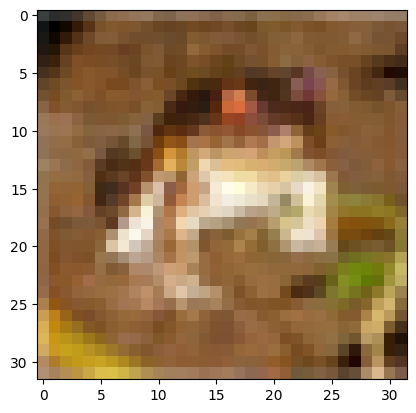

In [9]:
plt.imshow(single_image);

### Labeling

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train.shape

(50000, 1)

### Scaling and Reshaping

In [12]:
x_train.max()

np.uint8(255)

In [13]:
x_train.min()

np.uint8(0)

In [14]:
x_train = x_train / 255
x_test = x_test / 255

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_test.shape

(10000, 32, 32, 3)

### Training a Custom Model

In [21]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [24]:
model.fit(x=x_train, y=y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.3467 - loss: 2.1133 - val_accuracy: 0.2488 - val_loss: 2.2587
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5728 - loss: 1.1963 - val_accuracy: 0.6597 - val_loss: 0.9545
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6640 - loss: 0.9536 - val_accuracy: 0.7217 - val_loss: 0.7997
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7153 - loss: 0.8111 - val_accuracy: 0.7359 - val_loss: 0.7551
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7461 - loss: 0.7217 - val_accuracy: 0.7093 - val_loss: 0.8380
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7673 - loss: 0.6688 - val_accuracy: 0.7396 - val_loss: 0.7684
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7842 - loss: 0.6176 - val_accuracy: 0.7503 - val_loss: 0.7201
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7957 - loss: 0.5871 - val_a

In [25]:
history = pd.DataFrame(model.history.history)

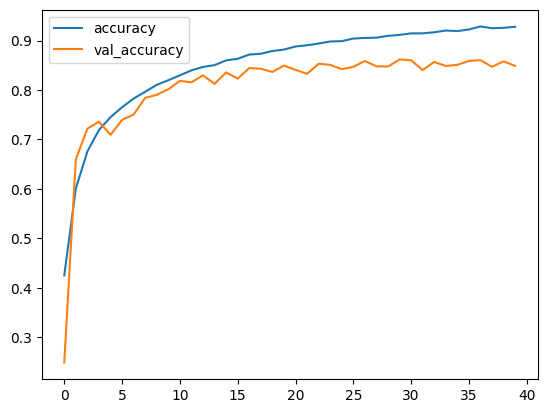

In [26]:
history[['accuracy', 'val_accuracy']].plot();

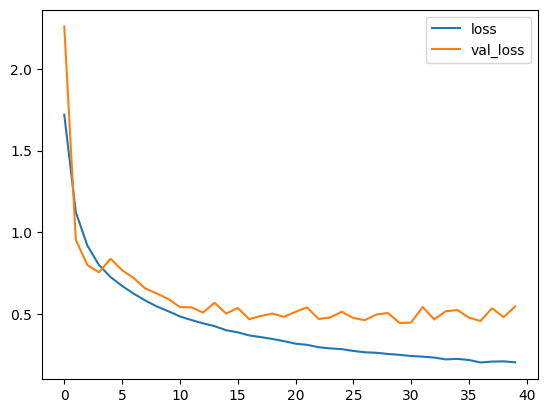

In [27]:
history[['loss', 'val_loss']].plot();

In [28]:
print(model.metrics_names)
print(model.evaluate(x_test, y_test, verbose=0))

['loss', 'compile_metrics']
[0.4454784095287323, 0.8618000149726868]


### Training a Prefab Model

In [45]:
base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(75, 75, 3)) # 75x75 recommended for EfficientNet

model = Sequential([
    Resizing(75, 75),
    base_model,
    GlobalAveragePooling2D(),
    Dense(units=256, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [46]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [48]:
model.fit(x=x_train, y=y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - accuracy: 0.2788 - loss: 1.9517 - val_accuracy: 0.1132 - val_loss: 4.3556
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.5524 - loss: 1.2374 - val_accuracy: 0.5514 - val_loss: 1.2622
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6577 - loss: 0.9585 - val_accuracy: 0.6181 - val_loss: 1.0653
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7189 - loss: 0.7968 - val_accuracy: 0.6527 - val_loss: 1.0081
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7552 - loss: 0.6974 - val_accuracy: 0.6858 - val_loss: 0.9452
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8138 - loss: 0.5406 - val_accuracy: 0.7172 - val_loss: 0.8493
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8514 - loss: 0.4314 - val_accuracy: 0.7164 - val_loss: 0.8938
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8820 - loss: 0

In [49]:
history = pd.DataFrame(model.history.history)

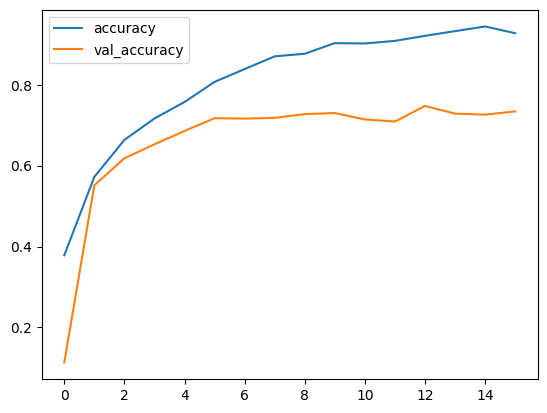

In [50]:
history[['accuracy', 'val_accuracy']].plot();

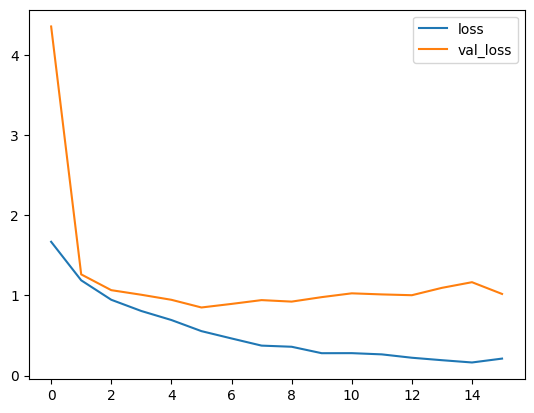

In [51]:
history[['loss', 'val_loss']].plot();

In [55]:
print(model.metrics_names)
print(model.evaluate(x_test, y_test, verbose=0))

['loss', 'compile_metrics']
[0.8493034243583679, 0.7171000242233276]


### Predict Classes

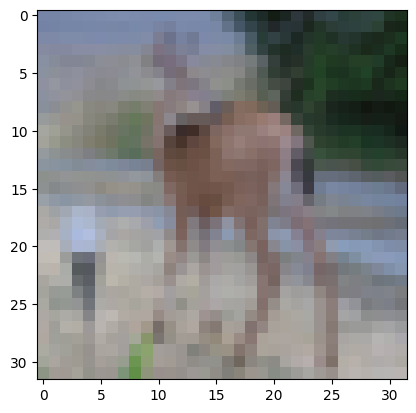

In [53]:
my_image = x_test[100]
plt.imshow(my_image);

In [56]:
prediction = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)), axis=1)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([7])